Certainly! Here's a version tailored for a README file:

# Product Classification with Convolutional Neural Networks (CNNs)

## Overview

This project aims to classify products into different categories using Convolutional Neural Networks (CNNs). The dataset comprises product images collected from the Slash application, covering a wide range of categories. The dataset is divided into training and testing sets, and preprocessing steps are applied to prepare the images for model training.

## Objectives

- Investigate the effectiveness of various CNN architectures for product classification.
- Implement and evaluate multiple CNN models on the test dataset.
- Apply techniques such as data augmentation, regularization, and early stopping to improve model performance.

## Approach

- **Data Preparation**: The dataset is preprocessed, and images are prepared for model training.
- **Model Development**: Several CNN architectures are implemented to classify products.
- **Training and Evaluation**: Models are trained on the training set and evaluated on the test set to assess their performance.
- **Optimization**: Techniques such as data augmentation, regularization, and early stopping are applied to enhance model accuracy and prevent overfitting.

## Next Steps

- Further fine-tuning of models for better performance.
- Exploration of additional techniques to improve classification accuracy.
- Deployment of the optimized model for practical use.

## Conclusion

Through this project, the goal is to build a robust product classification system using deep learning techniques, with the potential for real-world applications in various industries.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import re
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalMaxPool2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import categorical_crossentropy
from tensorflow.keras import layers, models, regularizers, optimizers, losses

In [19]:
def Train_data_preprocessing_(path, batch_size=32, target_size=(100, 100)):
    """
    Preprocesses training data by applying data augmentation techniques.

    Parameters:
    - path: The directory path containing class-wise subdirectories of images.
    - batch_size: The batch size used for loading images.
    - target_size: The target size to which all images are resized during preprocessing.

    Returns:
    - train_dataset: A data generator for the training dataset.
    - validation_dataset: A data generator for the validation dataset.
    """

    # Get the list of class directories
    class_directories = [os.path.join(path, cls) for cls in os.listdir(path) if os.path.isdir(os.path.join(path, cls))]

    for class_dir in class_directories:
        print(f"Class: {os.path.basename(class_dir)}")

        # Define an image generator with augmentation parameters
        image_generator = ImageDataGenerator(
            rescale=1 / 255,
            rotation_range=10,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split=0.2  # Split data into training and validation sets
        )

        # Generate training dataset from the directory
        train_dataset = image_generator.flow_from_directory(
            batch_size=batch_size,
            directory=path,
            shuffle=True,
            target_size=target_size,
            subset="training",  # Subset of data used for training
            class_mode='categorical'  # Use categorical mode for multi-class classification
        )

        # Generate validation dataset from the directory
        validation_dataset = image_generator.flow_from_directory(
            batch_size=batch_size,
            directory=path,
            shuffle=True,
            target_size=target_size,
            subset="validation",  # Subset of data used for validation
            class_mode='categorical'  # Use categorical mode for multi-class classification
        )

        # Count images after augmentation
        after_augmentation_count = len(train_dataset.filenames)
#         print(f"Number of images after augmentation: {after_augmentation_count}")
#         print("////////////////////////////////////////////////////////////////////////////////")

    return train_dataset, validation_dataset

train_path = "/kaggle/input/datasett/Train"
train_data, val_data = Train_data_preprocessing_(train_path)

Class: Beauty
Found 285 images belonging to 8 classes.
Found 67 images belonging to 8 classes.
Class: Nutrition
Found 285 images belonging to 8 classes.
Found 67 images belonging to 8 classes.
Class: Stationary
Found 285 images belonging to 8 classes.
Found 67 images belonging to 8 classes.
Class: Fashion
Found 285 images belonging to 8 classes.
Found 67 images belonging to 8 classes.
Class: Artifacts
Found 285 images belonging to 8 classes.
Found 67 images belonging to 8 classes.
Class: Games
Found 285 images belonging to 8 classes.
Found 67 images belonging to 8 classes.
Class: Home
Found 285 images belonging to 8 classes.
Found 67 images belonging to 8 classes.
Class: Accessories
Found 285 images belonging to 8 classes.
Found 67 images belonging to 8 classes.


In [20]:
def Test_data_preprocessing(path, batch_size=32, target_size=(100, 100)):
    """
    Preprocesses the test dataset for evaluation by resizing and normalizing the images.

    Args:
    - path (str): Path to the directory containing the test images.
    - batch_size (int): Batch size for generating batches of preprocessed images.
    - target_size (tuple): Tuple specifying the target size (height, width) to resize the images.

    Returns:
    - test_dataset (DirectoryIterator): Preprocessed test dataset iterator.
    """
    # Create an ImageDataGenerator instance for preprocessing
    image_generator = ImageDataGenerator(rescale=1 / 255)

    # Generate batches of preprocessed images from the test directory
    test_dataset = image_generator.flow_from_directory(
        batch_size=batch_size,
        directory=path,
        shuffle=False,  # Set shuffle to False for the test dataset
        target_size=target_size,
        class_mode='categorical'
    )

    return test_dataset
test_path = "/kaggle/input/dataset/Test"
test_data = Test_data_preprocessing(test_path)

Found 352 images belonging to 8 classes.


In [21]:
def train_evaluate_model(model_function, epochs=100):
    """
    Train and evaluate a CNN model using the given training and test data paths and the specified model function.

    Args:
    - model_function (function): Function that returns a compiled Keras model.
    - epochs (int): Number of epochs for training the model. Default is 100.

    Returns:
    - model: Trained Keras model.
    """
    
    # Build and train the model
    model = model_function(train_data, val_data, epochs)

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(model.history.history['accuracy'], label='Training Accuracy')
    plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(model.history.history['loss'], label='Training Loss')
    plt.plot(model.history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_data)
    print(f'Test accuracy: {test_accuracy * 100:.2f}%')

    return model


In [24]:
def cnn_model_2(train_data, val_data, epochs):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())


    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())


    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
 

    model.add(Conv2D(256, (3, 3)))
    model.add(GlobalMaxPool2D())

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))



    model.add(Dense(8, activation='softmax'))
    

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

    model_checkpoint = ModelCheckpoint('model_1.keras', monitor='val_loss', save_best_only=True)


    print("Start training...")
    model.fit(train_data, epochs=epochs, validation_data=val_data, callbacks=[early_stopping, model_checkpoint])
    print("Finished training...")

    return model


Start training...
Epoch 1/100


2024-03-21 21:24:27.468578: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1515: 5.1395, expected 4.51896
2024-03-21 21:24:27.468665: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6170: 4.98849, expected 4.36794
2024-03-21 21:24:27.468686: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8598: 5.15731, expected 4.53677
2024-03-21 21:24:27.468738: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19208: 6.18736, expected 5.46829
2024-03-21 21:24:27.468747: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19237: 6.04134, expected 5.32226
2024-03-21 21:24:27.468755: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19289: 5.95153, expected 5.23246
2024-03-21 21:24:27.468763: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19342: 5.95117, expected 5.23209
2024-03-21 21:24:27.468771: E e

1/9 ━━━━━━━━━━━━━━━━━━━━ 1:57 15s/step - accuracy: 0.0625 - loss: 2.4347

2024-03-21 21:24:32.563667: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48099: 6.85154, expected 6.02927
2024-03-21 21:24:32.563734: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48100: 7.12501, expected 6.30273
2024-03-21 21:24:32.563744: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48163: 6.44878, expected 5.62651
2024-03-21 21:24:32.563752: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48187: 6.80461, expected 5.98234
2024-03-21 21:24:32.563761: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48260: 7.00122, expected 6.17894
2024-03-21 21:24:32.563769: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48261: 6.94107, expected 6.1188
2024-03-21 21:24:32.563777: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48262: 7.12949, expected 6.30722
2024-03-21 21:24:32.563786: 

5/9 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.0893 - loss: 2.2820   

2024-03-21 21:24:39.423417: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19208: 6.30364, expected 5.45965
2024-03-21 21:24:39.423474: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19209: 6.45321, expected 5.60923
2024-03-21 21:24:39.423484: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19210: 6.63818, expected 5.7942
2024-03-21 21:24:39.423492: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19212: 7.32725, expected 6.48327
2024-03-21 21:24:39.423501: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19214: 6.76738, expected 5.9234
2024-03-21 21:24:39.423509: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19217: 7.32728, expected 6.48329
2024-03-21 21:24:39.423517: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19218: 7.15899, expected 6.315
2024-03-21 21:24:39.423525: E e

9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1216 - loss: 2.2166 - val_accuracy: 0.1940 - val_loss: 2.0699
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - accuracy: 0.2087 - loss: 1.9698 - val_accuracy: 0.1940 - val_loss: 2.0352
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step - accuracy: 0.2998 - loss: 1.8816 - val_accuracy: 0.1940 - val_loss: 1.8717
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.3056 - loss: 1.7860 - val_accuracy: 0.1940 - val_loss: 1.9257
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.3132 - loss: 1.7027 - val_accuracy: 0.1940 - val_loss: 1.8425
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.3887 - loss: 1.6704 - val_accuracy: 0.1940 - val_loss: 2.1343
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.4645 - loss: 1.5938 - val_accuracy: 0.2985 - val_loss: 2.0238
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.4646 - loss: 1.4894 - val_accuracy: 0.1642 - val_loss: 1.912

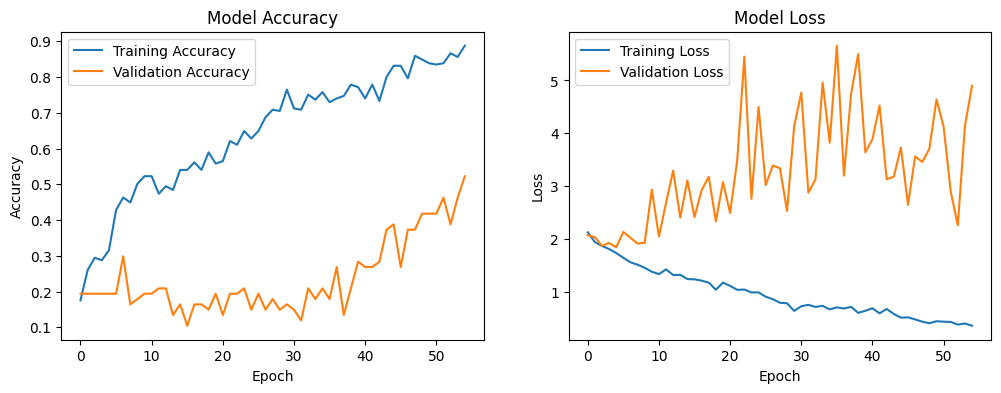

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 584ms/step - accuracy: 0.0891 - loss: 1.9277
Test accuracy: 18.75%


<Sequential name=sequential_2, built=True>

In [25]:
train_evaluate_model(cnn_model_2, epochs=100)

In [29]:
def build_alexnet(input_shape=(100, 100, 3), num_classes=8):
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Convolutional Block 2
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Convolutional Block 3
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def train_alexnet(model, train_data, test_data, epochs=100):
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Define model checkpoint callback to save the best weights
#     model_checkpoint = ModelCheckpoint('alexnet_best22.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

    # Training
    print("Start training...")
    model.fit(train_data, epochs=epochs, validation_data=test_data, callbacks=[early_stopping], verbose=1)
    print("Finished training...")

    return model

input_shape = (100, 100, 3)
num_classes = 8

# Build and train the model
alexnet_model = build_alexnet(input_shape, num_classes)
trained_model = train_alexnet(alexnet_model, train_data, test_data, epochs=100)

Start training...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.1473 - loss: 5.1448 - val_accuracy: 0.2926 - val_loss: 3.1611
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 826ms/step - accuracy: 0.2293 - loss: 1.8921 - val_accuracy: 0.0483 - val_loss: 8.1431
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 837ms/step - accuracy: 0.3088 - loss: 1.8416 - val_accuracy: 0.0483 - val_loss: 8.7185
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 829ms/step - accuracy: 0.3067 - loss: 1.7565 - val_accuracy: 0.0483 - val_loss: 10.4550
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 829ms/step - accuracy: 0.3170 - loss: 1.7300 - val_accuracy: 0.1278 - val_loss: 4.4519
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 843ms/step - accuracy: 0.3098 - loss: 1.7074 - val_accuracy: 0.3040 - val_loss: 2.6528
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 784ms/step - accuracy: 0.3560 - loss: 1.5864 - val_accuracy: 0.2500 - val_loss: 4.4438
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 836ms/step - accuracy: 0.3820 - loss: 1.6196 - 